Please run `sh setup.sh` first

In [1]:
import cv2

from utils import show
from depth import get_depth

/Users/rajatjacob/.pyenv/versions/3.9.17/envs/dos-locos/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of DPTForDepthEstimation were not initialized from the model checkpoint at Intel/dpt-large and are newly initialized: ['neck.fusion_stage.layers.0.residual_layer1.convolution1.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution1.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## Depth Estimation

In [2]:
def show_depth_estimation(image_path):
	image = cv2.imread(image_path)
	show(image)
	return get_depth(image_path)

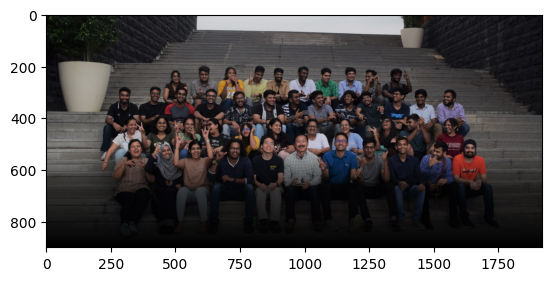

In [3]:
show_depth_estimation('./images/TLP.jpeg')

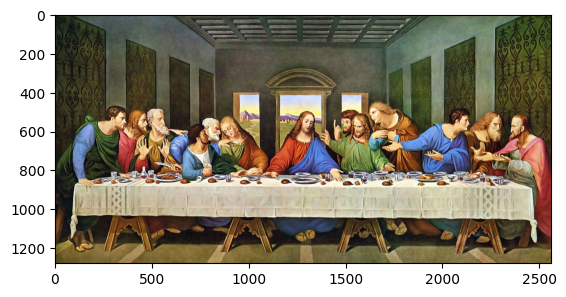

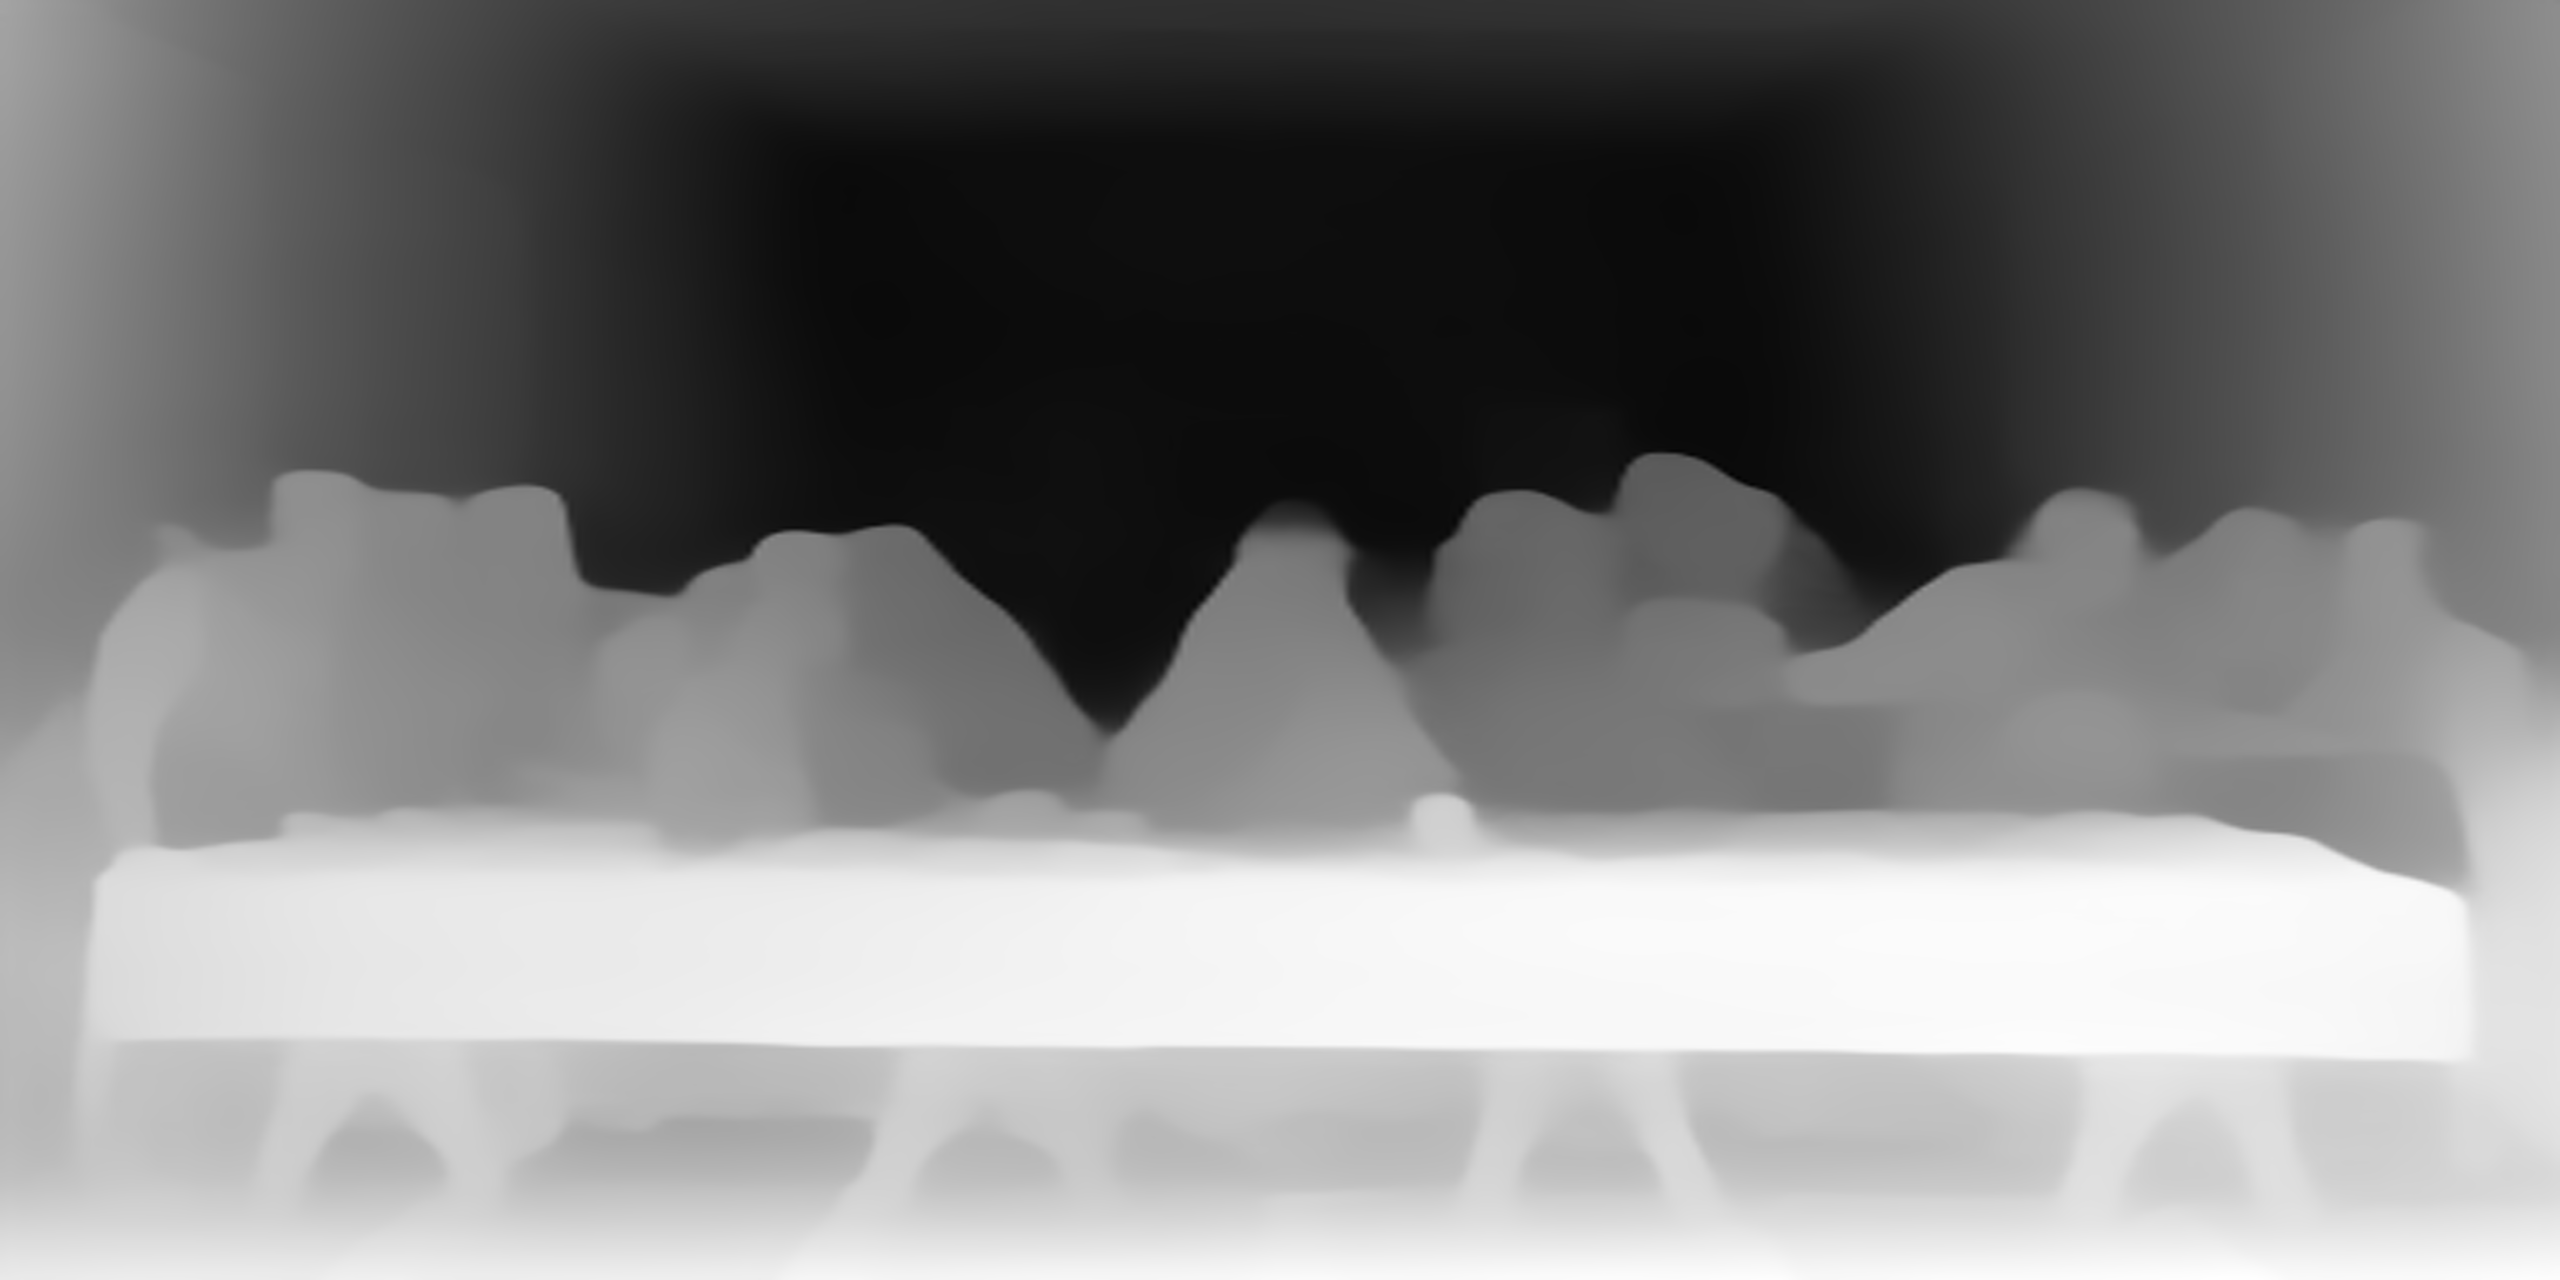

In [ ]:
show_depth_estimation('images/The-Last-Supper.jpg')

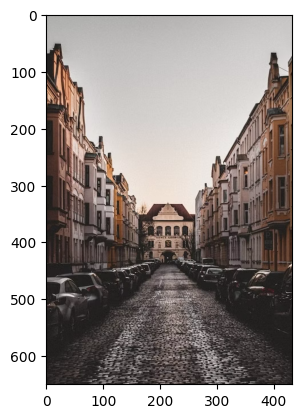

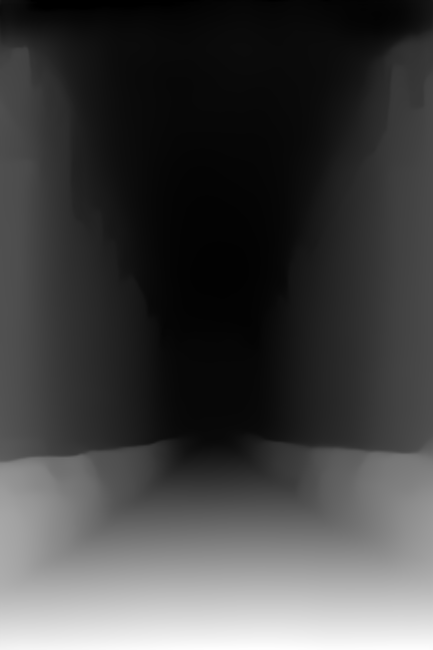

In [ ]:
show_depth_estimation("./images/street.png")

## Image Segmentation

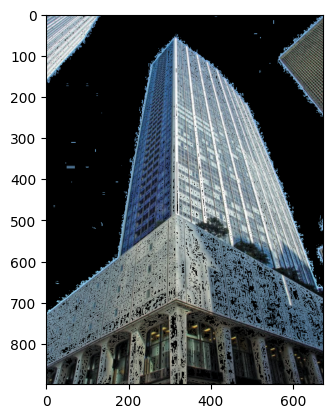

In [ ]:
from utils import viterbi_object_segmentation

show(viterbi_object_segmentation(cv2.imread('images/3point.jpeg')))

## Stereovision

In [1]:
from stereo.stereo import read_image, StereoImageConfig, show_disparity, merge_images, display_image_difference, display_mean_image

In [2]:
def display_stereo(config: StereoImageConfig):
    assert isinstance(
        config, StereoImageConfig), "config must be an instance of StereoImageConfig"
    stereoL, stereoR = read_image(config, should_show=True)
    show_disparity(stereoL, stereoR, blockSize=config.block_size)
    merge_images(stereoL, stereoR, blockSize=config.block_size)
    display_mean_image(stereoL, stereoR)
    display_image_difference(stereoL, stereoR)

In [3]:
# Available stereo images
list(StereoImageConfig)

[<StereoImageConfig.SATELLITE: 'satellite'>,
 <StereoImageConfig.CORRIDOR: 'corridor'>,
 <StereoImageConfig.PASSAU: 'passau'>,
 <StereoImageConfig.BUILDING: 'building'>,
 <StereoImageConfig.PARKING: 'parking'>,
 <StereoImageConfig.MOON: 'moon'>,
 <StereoImageConfig.SNOW: 'snow'>,
 <StereoImageConfig.NEBULA: 'nebula'>,
 <StereoImageConfig.PENTAGON: 'pentagon'>,
 <StereoImageConfig.BUG: 'bug'>]

### Depth map from stereo images

Try `snow`, `bug` and `pentagon`. They're really interesting.

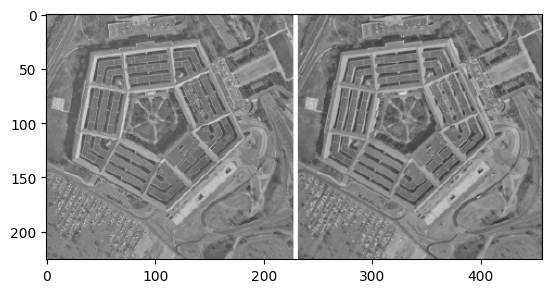

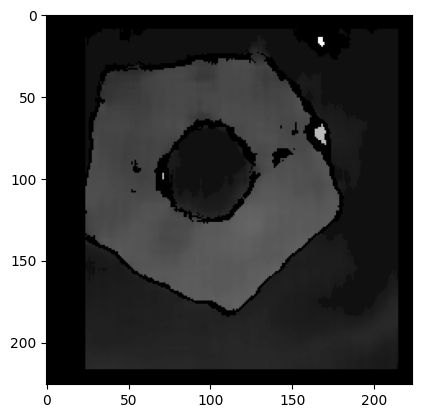

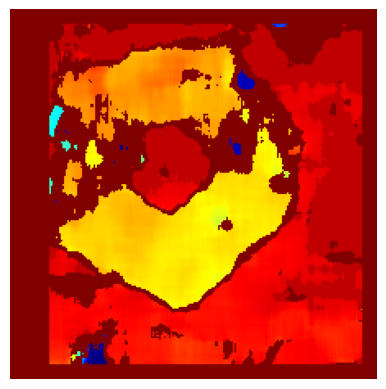

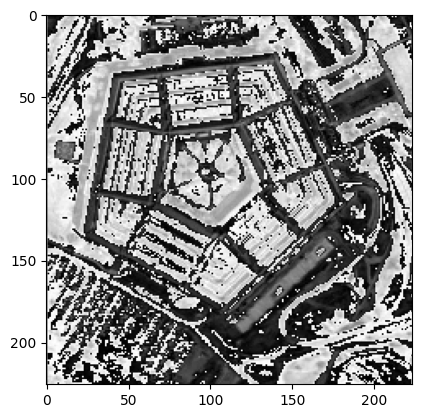

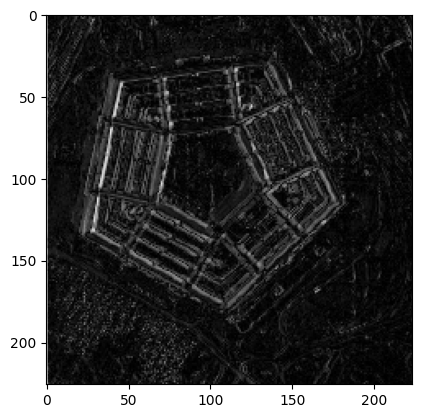

In [4]:
display_stereo(StereoImageConfig.PENTAGON)

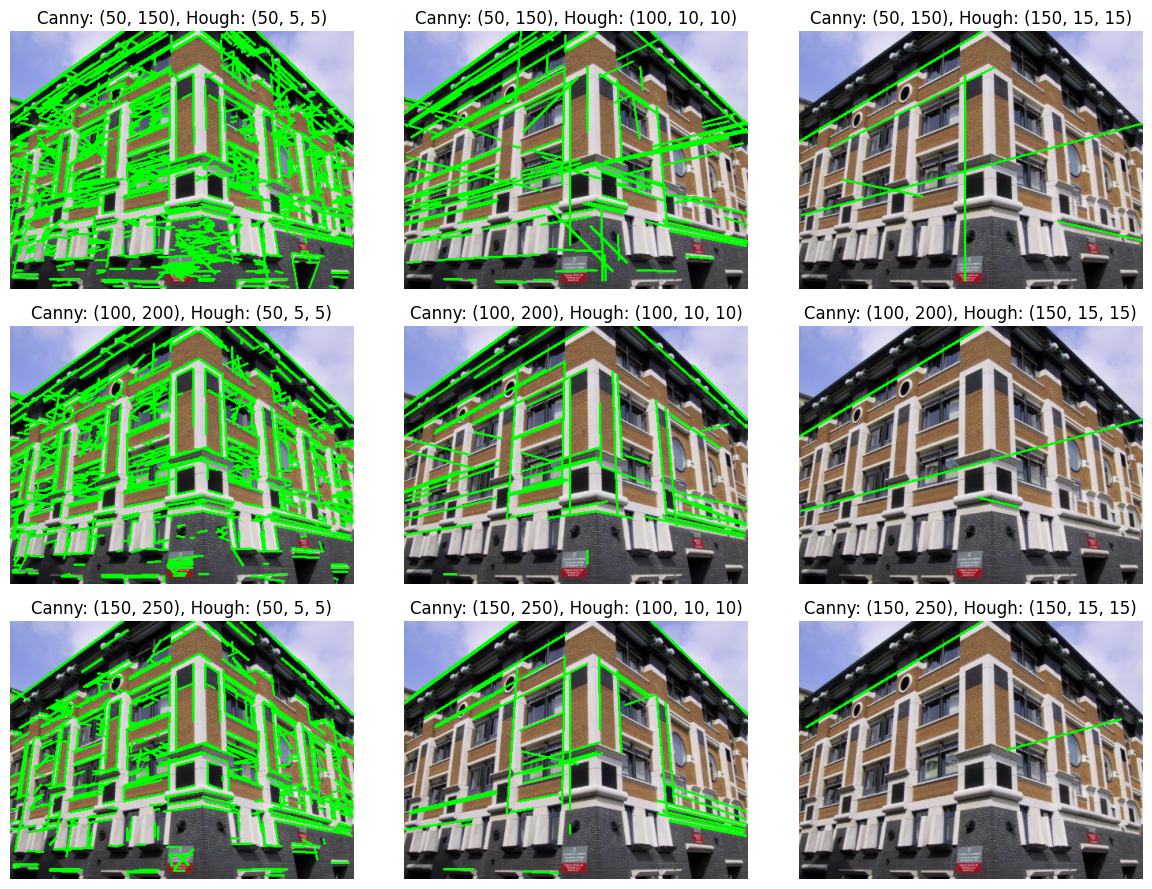

In [12]:
from vanishing import try_multi_vanishing_lines


try_multi_vanishing_lines(cv2.imread('images/corner_building.jpg'))